In [44]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Arc
import math

In [85]:
def get_angle_plot(line1, line2, offset = 1, color = None, origin = [0,0], len_x_axis = 1, len_y_axis = 1):

    l1xy = line1.get_xydata()
#     print(l1xy)
    # Angle between line1 and x-axis
    slope1 = (l1xy[1][1] - l1xy[0][1]) / float(l1xy[1][0] - l1xy[0][0])
    angle1 = abs(math.degrees(math.atan(slope1))) # Taking only the positive angle
    
    l2xy = line2.get_xydata()
    print('l2xy:\n %s' % l2xy)
    # Angle between line2 and x-axis
    # X Y (start point) (0, 0)
    # X Y (end point) (0, 0)
    # slope2 = (EPY - SPY) / (EPX - SPX)
    slope2 = (l2xy[1][1] - l2xy[0][1]) / float(l2xy[1][0] - l2xy[0][0])
    print('slope2 Radians: %s \n' % slope2)
    angle2 = abs(math.degrees(math.atan(slope2)))

    theta1 = min(angle1, angle2)
    theta2 = max(angle1, angle2)

    angle = theta2 - theta1

    if color is None:
        color = line1.get_color() # Uses the color of line 1 if color parameter is not passed.

    return Arc(origin, len_x_axis*offset, len_y_axis*offset, 0, theta1, theta2, color=color, label = str(angle)+u"\u00b0")

def get_angle_text(angle_plot):
    angle = angle_plot.get_label()[:-1] # Excluding the degree symbol
    angle = "%0.2f"%float(angle)+u"\u00b0" # Display angle upto 2 decimal places

    # Get the vertices of the angle arc
    vertices = angle_plot.get_verts()
    print(vertices)
    # Get the midpoint of the arc extremes
    x_width = (vertices[0][0] + vertices[-1][0]) / 2.0
    y_width = (vertices[0][5] + vertices[-1][6]) / 2.0

    #print x_width, y_width

    separation_radius = max(x_width/2.0, y_width/2.0)

    return [ x_width + separation_radius, y_width + separation_radius, angle]       

In [86]:
fig = plt.figure()

line_1 = Line2D([0,1], [0,4], linewidth=1, linestyle = "-", color="green")
line_2 = Line2D([0,4.5], [0,3], linewidth=1, linestyle = "-", color="red")

ax = fig.add_subplot(1,1,1)

ax.add_line(line_1)
ax.add_line(line_2)

angle_plot = get_angle_plot(line_1, line_2, 1)
# angle_text = get_angle_text(angle_plot) 
# Gets the arguments to be passed to ax.text as a list to display the angle value besides the arc
# print('angle: %s' % angle_plot)
ax.add_patch(angle_plot) # To display the angle arc
# ax.text(*angle_text) # To display the angle value

ax.set_xlim(0,7)
ax.set_ylim(0,5)


line_3 = Line2D([0,7], [0,1], linewidth=1, linestyle = "-", color="brown")
ax.add_line(line_3)
angle_plot = get_angle_plot(line_1, line_3, 2, color="red") # Second angle arc will be red in color
# angle_text = get_angle_text(angle_plot)

ax.add_patch(angle_plot) # To display the 2nd angle arc
# ax.text(*angle_text) # To display the 2nd angle value

l2xy:
 [[ 0.   0. ]
 [ 4.5  3. ]]
slope2 Radians: 0.666666666667 

l2xy:
 [[ 0.  0.]
 [ 7.  1.]]
slope2 Radians: 0.142857142857 



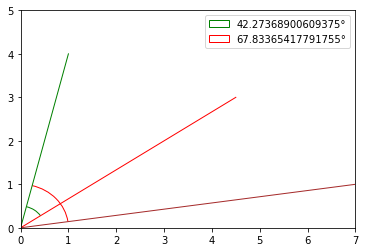

In [74]:
plt.legend()
plt.show()